In [221]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

url = 'https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv'
passageiros = pd.read_csv(url)

In [222]:
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

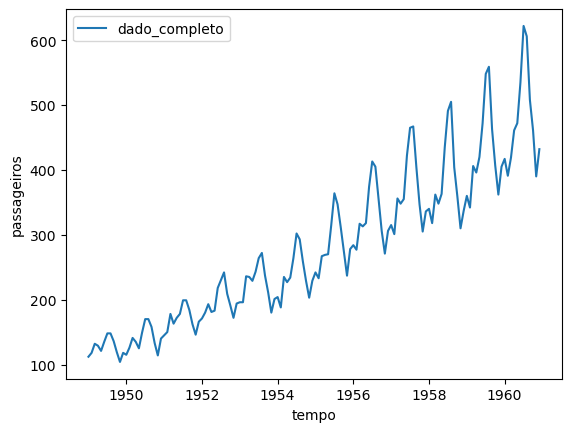

In [223]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label ='dado_completo')

In [224]:
sc = StandardScaler()

In [225]:
sc.fit(passageiros)

StandardScaler()

In [226]:
dado_escalado = sc.transform(passageiros)

In [227]:
x = dado_escalado[:,0]
y = dado_escalado[:,1]

<AxesSubplot:>

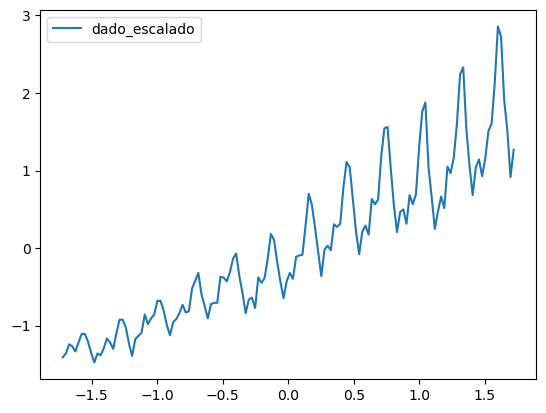

In [228]:
sns.lineplot(x=x, y=y, label='dado_escalado')

In [229]:
tamanho_treino = int(len(passageiros) * 0.8)
tamanho_teste = len(passageiros) - tamanho_treino

In [230]:
xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]

In [231]:
xteste = x[tamanho_treino:len(passageiros)]
yteste = y[tamanho_treino:len(passageiros)]

Text(0.5, 0, 'Tempo')

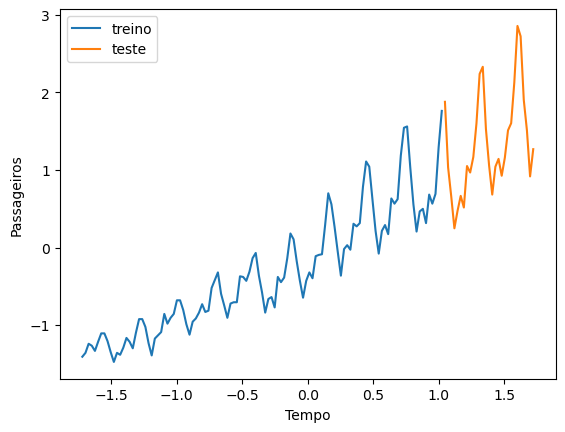

In [232]:
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xteste, y=yteste, label='teste')
plt.ylabel('Passageiros')
plt.xlabel('Tempo')

In [233]:
regressor = Sequential()

In [234]:
regressor.add(Dense(1, input_dim=1, kernel_initializer='Ones', activation='linear', use_bias=False))

In [235]:
regressor.compile(loss='mean_squared_error', optimizer='adam')

In [236]:
regressor.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 1)                 1         
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [237]:
regressor.fit(xtreino, ytreino, epochs=1000, verbose=0)

In [238]:
y_predict = regressor.predict(xtreino)

<AxesSubplot:>

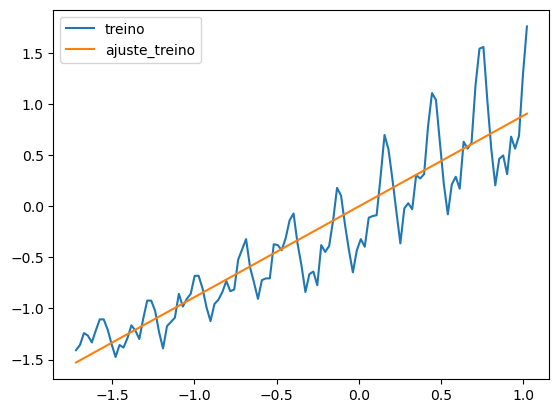

In [239]:
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='ajuste_treino')

In [240]:
df = {'tempo': xtreino, 'passageiros': y_predict[:,0]}

In [241]:
resultados = pd.DataFrame(data = df)

In [242]:
resultado_transformado = sc.inverse_transform(resultados)

In [243]:
resultado_transformado = pd.DataFrame(resultado_transformado)

In [244]:
resultado_transformado.columns = ['tempo', 'passageiros']

<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

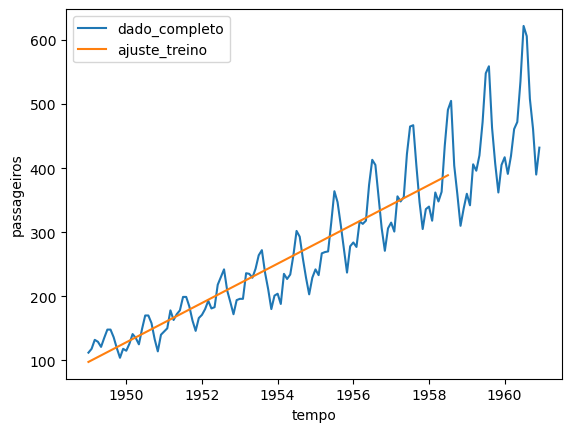

In [245]:
sns.lineplot(x='tempo', y='passageiros', data = passageiros, label='dado_completo')
sns.lineplot(x='tempo',y='passageiros', data = resultado_transformado, label='ajuste_treino')

In [246]:
y_predict_teste = regressor.predict(xteste)

In [247]:
d = {'tempo': xteste, 'passageiros': y_predict_teste[:,0]}
resultados_teste = pd.DataFrame(data = d)
resultados_teste

,tempo,passageiros
0,1.046473,0.930104
1,1.070529,0.951486
2,1.094586,0.972867
3,1.118643,0.994249
4,1.142700,1.015631
5,1.166757,1.037013
6,1.190814,1.058394
7,1.214870,1.079776
8,1.238927,1.101158
9,1.262984,1.122539


In [248]:
resultado_transformado_teste = sc.inverse_transform(resultados_teste)

In [249]:
resultado_transf_teste = pd.DataFrame(resultado_transformado_teste)

In [250]:
resultado_transf_teste.columns = ['tempo', 'passageiros']

<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

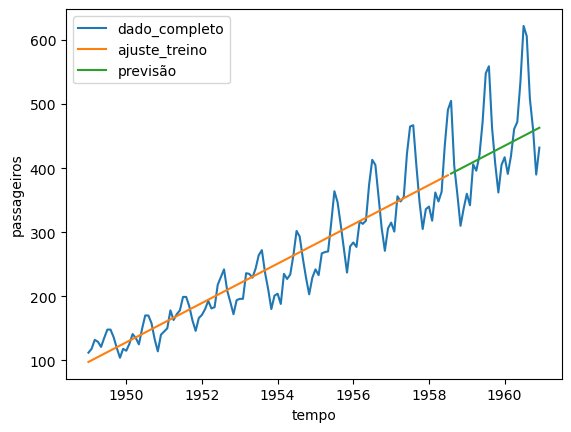

In [251]:
sns.lineplot(x='tempo', y='passageiros', data = passageiros, label='dado_completo')
sns.lineplot(x='tempo',y='passageiros', data = resultado_transformado, label='ajuste_treino')
sns.lineplot(x='tempo', y='passageiros', data= resultado_transf_teste, label = 'previsão')

In [252]:
regressor2 = Sequential()

In [253]:
regressor2.add(Dense(8, input_dim=1, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor2.add(Dense(8, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor2.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

In [254]:
regressor2.compile(loss='mean_squared_error', optimizer='adam')

In [255]:
regressor2.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 8)                 8         
_________________________________________________________________
dense_44 (Dense)             (None, 8)                 64        
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 8         
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [256]:
regressor2.fit(xtreino, ytreino, epochs=1000)

Epoch 1/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.6835
Epoch 2/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6744
Epoch 3/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.6642
Epoch 4/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6555
Epoch 5/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.6475
Epoch 6/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6394
Epoch 7/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.6325
Epoch 8/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6269
Epoch 9/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.6204
Epoch 10/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.6151
Epoch 11/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.6100
Epoch 12/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.6065
Epoch 13/1000
4/4 [==============================

In [257]:
y_predict = regressor2.predict(xtreino)

In [258]:
y_predict_teste = regressor2.predict(xteste)

<AxesSubplot:>

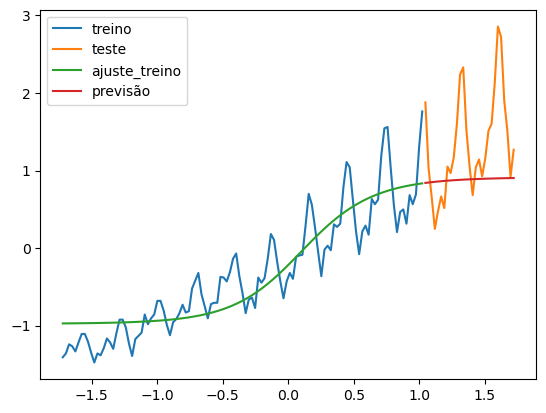

In [259]:
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xteste, y=yteste, label='teste')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='ajuste_treino')
sns.lineplot(x=xteste, y=y_predict_teste[:,0], label='previsão')

In [260]:
vetor = pd.DataFrame(ytreino)[0]

In [261]:
def separa_dados(vetor,n_passos):
    x_novo,y_novo = [],[]
    for i in range(n_passos, vetor.shape[0]):
        x_novo.append(list(vetor.loc[i-n_passos:i-1]))
        y_novo.append(vetor.loc[i])
    x_novo, y_novo = np.array(x_novo), np.array(y_novo)
    return x_novo, y_novo

In [262]:
xtreino_novo, ytreino_novo = separa_dados(vetor, 1)

In [263]:
xtreino_novo[:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [264]:
ytreino_novo[:5]

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

In [265]:
vetor2 = pd.DataFrame(yteste)[0]

In [266]:
xteste_novo, yteste_novo = separa_dados(vetor2, 1)

In [267]:
regressor3 = Sequential()

In [268]:
regressor3.add(Dense(8, input_dim=1, kernel_initializer='Ones', activation='linear', use_bias=False))
regressor3.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor3.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

In [269]:
regressor3.compile(loss='mean_squared_error', optimizer='adam')

In [270]:
regressor3.fit(xtreino_novo, ytreino_novo, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6145
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5642
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5505
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5351
Epoch 5/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5208
Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5042
Epoch 7/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4851
Epoch 8/100
4/4 [==============================] - 0s 998us/step - loss: 0.4663
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.4528
Epoch 10/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4309
Epoch 11/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4091
Epoch 12/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3854
Epoch 13/100
4/4 [==============================] - 0s 1ms/

In [271]:
y_predict_novo = regressor3.predict(xtreino_novo)

In [272]:
len(passageiros)

144

In [274]:
sns.lineplot(x='tempo', y=ytreino_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data = passageiros[1:129], label='ajuste_treino')

ValueError: Length of ndarray vectors must match length of `data` when both are used, but `data` has length 128 and the vector passed to `y` has length 114.

In [ ]:
y_predict_teste_novo = regressor3.predict(xteste_novo)

In [ ]:
resultado = pd.DataFrame(y_predict_teste_novo)

In [ ]:
sns.lineplot(x='tempo', y=ytreino_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data = passageiros[1:129], label='ajuste_treino')
sns.lineplot(x='tempo', y=yteste_novo, data=passageiros[130:144], label='teste')
sns.lineplot(x='tempo', y=resultado.values, data=passageiros[130:144], label='previsão')

ValueError: Length of ndarray vectors must match length of `data` when both are used, but `data` has length 128 and the vector passed to `y` has length 114.

In [275]:
xtreino_novo, ytreino_novo = separa_dados(vetor, 4)

In [276]:
xtreino_novo[:5]

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [277]:
ytreino_novo[:5]

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

In [278]:
xteste_novo, yteste_novo = separa_dados(vetor2, 4)

In [280]:
regressor4 = Sequential()

In [281]:
regressor4.add(Dense(8, input_dim=4, kernel_initializer='Ones', activation='linear', use_bias=False))
regressor4.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor4.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

In [282]:
regressor4.compile(loss='mean_squared_error', optimizer='adam')

In [283]:
regressor4.fit(xtreino_novo, ytreino_novo, epochs=300)

Epoch 1/300
4/4 [==============================] - 1s 4ms/step - loss: 0.6052
Epoch 2/300
4/4 [==============================] - 0s 2ms/step - loss: 0.5230
Epoch 3/300
4/4 [==============================] - 0s 2ms/step - loss: 0.4652
Epoch 4/300
4/4 [==============================] - 0s 5ms/step - loss: 0.4207
Epoch 5/300
4/4 [==============================] - 0s 4ms/step - loss: 0.3795
Epoch 6/300
4/4 [==============================] - 0s 3ms/step - loss: 0.3378
Epoch 7/300
4/4 [==============================] - 0s 5ms/step - loss: 0.2992
Epoch 8/300
4/4 [==============================] - 0s 2ms/step - loss: 0.2622
Epoch 9/300
4/4 [==============================] - 0s 3ms/step - loss: 0.2308
Epoch 10/300
4/4 [==============================] - 0s 4ms/step - loss: 0.1989
Epoch 11/300
4/4 [==============================] - 0s 4ms/step - loss: 0.1741
Epoch 12/300
4/4 [==============================] - 0s 3ms/step - loss: 0.1546
Epoch 13/300
4/4 [==============================] - 0s 5ms/st

In [284]:
y_predict_novo = regressor4.predict(xtreino_novo)

In [285]:
y_predict_teste_novo = regressor4.predict(xteste_novo)

In [286]:
resultado_treino = pd.DataFrame(y_predict_novo)[0]

In [288]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

In [293]:
sns.lineplot(x='tempo', y=ytreino_novo, data=passageiros[4:129], label='treino')
sns.lineplot(x='tempo', y=resultado_treino, data = passageiros[4:129], label='ajuste_treino')
sns.lineplot(x='tempo', y=yteste_novo, data=passageiros[133:144], label='teste')
sns.lineplot(x='tempo', y=resultado.values, data=passageiros[133:144], label='previsão')

ValueError: Length of ndarray vectors must match length of `data` when both are used, but `data` has length 125 and the vector passed to `y` has length 111.